In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p /content/data
!rm -rf /content/data/*.csv
!ln -s /content/drive/MyDrive/DE_Scale_Project/Datasets/All_cities/*.csv /content/data/

Global Imports

In [ ]:
# Import pandas and relevant visulisation libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
from ipywidgets import widgets, interact, interact_manual
from IPython.display import display


# Ensure plots are displayed inline in the notebook
%matplotlib inline

# Suppress warnings for slice modification
pd.options.mode.chained_assignment = None


In [ ]:
def read_csv(path_to_file):
  return pd.read_csv(path_to_file)

# df_Delhi = read_csv('/content/data/City_Mumbai_wise_raw_data_1Hr_2019_2023.csv')
# df_Bengaluru = read_csv('/content/data/City_Bengaluru_wise_raw_data_1Hr_2019_2023.csv')
# df_Hyderabad = read_csv('/content/data/City_Hyderabad_wise_raw_data_1Hr_2019_2023.csv')
# df_Chennai = read_csv('/content/data/City_Chennai_wise_raw_data_1Hr_2019_2023.csv')
# df_Kolkata = read_csv('/content/data/City_Kolkata_wise_raw_data_1Hr_2019_2023.csv')
# df_Mumbai = read_csv('/content/data/City_Mumbai_wise_raw_data_1Hr_2019_2023.csv')
df_All_cities = read_csv('/content/data/City_All_wise_raw_data_1Hr_2019_2023.csv')



Data Pre-processing

In [ ]:
df_All_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262944 entries, 0 to 262943
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   City                 262944 non-null  object 
 1   Timestamp            262944 non-null  object 
 2   PM2.5 (µg/m³)        262840 non-null  float64
 3   PM10 (µg/m³)         256602 non-null  float64
 4   NO (µg/m³)           262647 non-null  float64
 5   NO2 (µg/m³)          262532 non-null  float64
 6   NOx (ppb)            262853 non-null  float64
 7   NH3 (µg/m³)          258772 non-null  float64
 8   SO2 (µg/m³)          262736 non-null  float64
 9   CO (mg/m³)           262890 non-null  float64
 10  Ozone (µg/m³)        262846 non-null  float64
 11  Benzene (µg/m³)      262830 non-null  float64
 12  Toluene (µg/m³)      246592 non-null  float64
 13  Xylene (µg/m³)       141329 non-null  float64
 14  O Xylene (µg/m³)     64979 non-null   float64
 15  Eth-Benzene (µg/m

In [ ]:
# Convert Timestamp to datetime format
df_All_cities['Timestamp'] = pd.to_datetime(df_All_cities['Timestamp'])
df_All_cities.info()
df_All_cities = df_All_cities.sort_values(by=['City', 'Timestamp']).reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262944 entries, 0 to 262943
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   City                 262944 non-null  object        
 1   Timestamp            262944 non-null  datetime64[ns]
 2   PM2.5 (µg/m³)        262840 non-null  float64       
 3   PM10 (µg/m³)         256602 non-null  float64       
 4   NO (µg/m³)           262647 non-null  float64       
 5   NO2 (µg/m³)          262532 non-null  float64       
 6   NOx (ppb)            262853 non-null  float64       
 7   NH3 (µg/m³)          258772 non-null  float64       
 8   SO2 (µg/m³)          262736 non-null  float64       
 9   CO (mg/m³)           262890 non-null  float64       
 10  Ozone (µg/m³)        262846 non-null  float64       
 11  Benzene (µg/m³)      262830 non-null  float64       
 12  Toluene (µg/m³)      246592 non-null  float64       
 13  Xylene (µg/m³)

In [ ]:
# Find percentage missing values in each column

def missing_percentage(df):
  return (df.isnull().sum() / len(df)) * 100

missing_percentage_df = pd.DataFrame(missing_percentage(df_All_cities))
missing_percentage_df.reset_index(inplace=True)
missing_percentage_df.columns = ['Column Name', 'Missing Percentage']
missing_percentage_df

,Column Name,Missing Percentage
0,City,0.000000
1,Timestamp,0.000000
2,PM2.5 (µg/m³),0.039552
3,PM10 (µg/m³),2.411920
4,NO (µg/m³),0.112952
5,NO2 (µg/m³),0.156687
6,NOx (ppb),0.034608
7,NH3 (µg/m³),1.586650
8,SO2 (µg/m³),0.079104
9,CO (mg/m³),0.020537


In [ ]:
# Drop columns with more than 10% of missing values
threshold = 10

columns_to_keep = missing_percentage_df[missing_percentage_df['Missing Percentage'] < threshold]['Column Name'].tolist()
columns_to_drop = missing_percentage_df[missing_percentage_df['Missing Percentage'] >= threshold]['Column Name'].tolist()

print("Columns to keep:")
print(columns_to_keep)

print("\nColumns to drop:")
print(columns_to_drop)

df_All_cities = df_All_cities[columns_to_keep]

Columns to keep:
['City', 'Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)']

Columns to drop:
['Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'RF (mm)', 'VWS (m/s)']


In [ ]:
missing_percentage_df = pd.DataFrame(missing_percentage(df_All_cities))
missing_percentage_df.reset_index(inplace=True)
missing_percentage_df.columns = ['Column Name', 'Missing Percentage']
missing_percentage_df

,Column Name,Missing Percentage
0,City,0.000000
1,Timestamp,0.000000
2,PM2.5 (µg/m³),0.039552
3,PM10 (µg/m³),2.411920
4,NO (µg/m³),0.112952
5,NO2 (µg/m³),0.156687
6,NOx (ppb),0.034608
7,NH3 (µg/m³),1.586650
8,SO2 (µg/m³),0.079104
9,CO (mg/m³),0.020537


In [ ]:
# Handle missing values in columns using linear interpolate method since this is time series data

# Interpolate missing values using linear interpolation for time series data
for column in df_All_cities.columns:
  if df_All_cities[column].dtype != 'object':  # Only interpolate numerical columns
    df_All_cities[column] = df_All_cities[column].interpolate(method='linear')

# Print some info about the new DataFrame
df_All_cities.info()
missing_percentage_df = pd.DataFrame(missing_percentage(df_All_cities))
missing_percentage_df.reset_index(inplace=True)
missing_percentage_df.columns = ['Column Name', 'Missing Percentage']
missing_percentage_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262944 entries, 0 to 262943
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   City             262944 non-null  object        
 1   Timestamp        262944 non-null  datetime64[ns]
 2   PM2.5 (µg/m³)    262944 non-null  float64       
 3   PM10 (µg/m³)     262944 non-null  float64       
 4   NO (µg/m³)       262944 non-null  float64       
 5   NO2 (µg/m³)      262944 non-null  float64       
 6   NOx (ppb)        262944 non-null  float64       
 7   NH3 (µg/m³)      262944 non-null  float64       
 8   SO2 (µg/m³)      262944 non-null  float64       
 9   CO (mg/m³)       262944 non-null  float64       
 10  Ozone (µg/m³)    262944 non-null  float64       
 11  Benzene (µg/m³)  262944 non-null  float64       
 12  Toluene (µg/m³)  262944 non-null  float64       
 13  AT (°C)          262944 non-null  float64       
 14  RH (%)           262

,Column Name,Missing Percentage
0,City,0.0
1,Timestamp,0.0
2,PM2.5 (µg/m³),0.0
3,PM10 (µg/m³),0.0
4,NO (µg/m³),0.0
5,NO2 (µg/m³),0.0
6,NOx (ppb),0.0
7,NH3 (µg/m³),0.0
8,SO2 (µg/m³),0.0
9,CO (mg/m³),0.0


Feature Engineering

In [ ]:
# Vehicular pollution parameters = PM2.5 + NOx + CO + SO2
# Industrial_Pollution parameters =  Ozone + Benzene + NH3 + SO2 + PM10

# Calculate Vehicular pollution content
df_All_cities['Vehicular_Pollution'] = df_All_cities['NOx (ppb)'] + df_All_cities['CO (mg/m³)'] + df_All_cities['SO2 (µg/m³)'] + df_All_cities['PM2.5 (µg/m³)']
# Industrial pollution content = SO2 + Ozone + Benzene

# Calculate Industrial pollution content
df_All_cities['Industrial_Pollution'] =  df_All_cities['Ozone (µg/m³)'] + df_All_cities['Benzene (µg/m³)'] + df_All_cities['NH3 (µg/m³)'] + df_All_cities['SO2 (µg/m³)'] + df_All_cities['PM10 (µg/m³)']
df_All_cities.info()
(df_All_cities[df_All_cities['City'] == 'Kolkata']).Vehicular_Pollution.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262944 entries, 0 to 262943
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   City                  262944 non-null  object        
 1   Timestamp             262944 non-null  datetime64[ns]
 2   PM2.5 (µg/m³)         262944 non-null  float64       
 3   PM10 (µg/m³)          262944 non-null  float64       
 4   NO (µg/m³)            262944 non-null  float64       
 5   NO2 (µg/m³)           262944 non-null  float64       
 6   NOx (ppb)             262944 non-null  float64       
 7   NH3 (µg/m³)           262944 non-null  float64       
 8   SO2 (µg/m³)           262944 non-null  float64       
 9   CO (mg/m³)            262944 non-null  float64       
 10  Ozone (µg/m³)         262944 non-null  float64       
 11  Benzene (µg/m³)       262944 non-null  float64       
 12  Toluene (µg/m³)       262944 non-null  float64       
 13 

,Vehicular_Pollution
175296,625.740
175297,529.995
175298,451.595
175299,393.310
175300,372.730
175301,387.375
175302,372.215
175303,352.835
175304,345.550
175305,342.425


In [ ]:
# Find 24 hour average and 8 hour maximum as applicable for pollutants to calculate subindex

df_All_cities['PM2.5_24hr_avg'] = df_All_cities.groupby('City')['PM2.5 (µg/m³)'].rolling(window = 24, min_periods = 16).mean().values
df_All_cities['PM10_24hr_avg'] = df_All_cities.groupby('City')['PM10 (µg/m³)'].rolling(window = 24, min_periods = 16).mean().values
# df_All_cities['NO_24hr_avg'] = df_All_cities.groupby('City')['NO (µg/m³)'].rolling(window = 24, min_periods = 16).mean().values
df_All_cities['NO2_24hr_avg'] = df_All_cities.groupby('City')['NO2 (µg/m³)'].rolling(window = 24, min_periods = 16).mean().values
# df_All_cities['NOx_24hr_avg'] = df_All_cities.groupby('City')['NOx (ppb)'].rolling(window = 24, min_periods = 16).mean().values
df_All_cities['NH3_24hr_avg'] = df_All_cities.groupby('City')['NH3 (µg/m³)'].rolling(window = 24, min_periods = 16).mean().values
df_All_cities['CO_8hr_max'] = df_All_cities.groupby('City')['CO (mg/m³)'].rolling(window = 8, min_periods = 1).max().values
df_All_cities['SO2_24hr_avg'] = df_All_cities.groupby('City')['SO2 (µg/m³)'].rolling(window = 24, min_periods = 16).mean().values
df_All_cities['Ozone_8hr_max'] = df_All_cities.groupby('City')['Ozone (µg/m³)'].rolling(window = 8, min_periods = 1).max().values


df_All_cities.info()
# df_All_cities.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262944 entries, 0 to 262943
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   City                  262944 non-null  object        
 1   Timestamp             262944 non-null  datetime64[ns]
 2   PM2.5 (µg/m³)         262944 non-null  float64       
 3   PM10 (µg/m³)          262944 non-null  float64       
 4   NO (µg/m³)            262944 non-null  float64       
 5   NO2 (µg/m³)           262944 non-null  float64       
 6   NOx (ppb)             262944 non-null  float64       
 7   NH3 (µg/m³)           262944 non-null  float64       
 8   SO2 (µg/m³)           262944 non-null  float64       
 9   CO (mg/m³)            262944 non-null  float64       
 10  Ozone (µg/m³)         262944 non-null  float64       
 11  Benzene (µg/m³)       262944 non-null  float64       
 12  Toluene (µg/m³)       262944 non-null  float64       
 13 

In [ ]:
# Calculate pollutant subindexes

def PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df_All_cities['PM2.5_SubIndex'] = df_All_cities['PM2.5_24hr_avg'].apply(lambda x: PM25_subindex(x))


def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df_All_cities['PM10_SubIndex'] = df_All_cities['PM10_24hr_avg'].apply(lambda x: PM10_subindex(x))


def SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df_All_cities['SO2_SubIndex'] = df_All_cities['SO2_24hr_avg'].apply(lambda x: SO2_subindex(x))


def NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df_All_cities['NO2_SubIndex'] = df_All_cities['NO2_24hr_avg'].apply(lambda x: NO2_subindex(x))


def NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df_All_cities['NH3_SubIndex'] = df_All_cities['NH3_24hr_avg'].apply(lambda x: NH3_subindex(x))


def CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df_All_cities['CO_SubIndex'] = df_All_cities['CO_8hr_max'].apply(lambda x: CO_subindex(x))


def O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df_All_cities['O3_SubIndex'] = df_All_cities['Ozone_8hr_max'].apply(lambda x: O3_subindex(x))


In [ ]:
df_All_cities.info()
# df_All_cities.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262944 entries, 0 to 262943
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   City                  262944 non-null  object        
 1   Timestamp             262944 non-null  datetime64[ns]
 2   PM2.5 (µg/m³)         262944 non-null  float64       
 3   PM10 (µg/m³)          262944 non-null  float64       
 4   NO (µg/m³)            262944 non-null  float64       
 5   NO2 (µg/m³)           262944 non-null  float64       
 6   NOx (ppb)             262944 non-null  float64       
 7   NH3 (µg/m³)           262944 non-null  float64       
 8   SO2 (µg/m³)           262944 non-null  float64       
 9   CO (mg/m³)            262944 non-null  float64       
 10  Ozone (µg/m³)         262944 non-null  float64       
 11  Benzene (µg/m³)       262944 non-null  float64       
 12  Toluene (µg/m³)       262944 non-null  float64       
 13 

In [ ]:
# Add checks for subindex availability and compute AQI value

df_All_cities['Checks'] = (df_All_cities['PM2.5_SubIndex'] > 0).astype(int) + \
                          (df_All_cities['PM10_SubIndex'] > 0).astype(int) + \
                          (df_All_cities['SO2_SubIndex'] > 0).astype(int) +  \
                          (df_All_cities['NO2_SubIndex'] > 0).astype(int) + \
                          (df_All_cities['NH3_SubIndex'] > 0).astype(int) + \
                          (df_All_cities['CO_SubIndex'] > 0).astype(int) + \
                          (df_All_cities['O3_SubIndex'] > 0).astype(int)

df_All_cities['AQI'] = round(df_All_cities[['PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex', 'NO2_SubIndex',
                                 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex']].max(axis = 1))
df_All_cities.loc[df_All_cities['PM2.5_SubIndex'] + df_All_cities['PM10_SubIndex'] <= 0, 'AQI'] = np.NaN
df_All_cities.loc[df_All_cities.Checks < 3, 'AQI'] = np.NaN

In [ ]:
# From AQI value compute AQI class

def AQI_class(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df_All_cities["AQI_class"] = df_All_cities["AQI"].apply(lambda x: AQI_class(x))

In [ ]:
# Create two dataframes from df_All_cities. One with all the data from 2019 to 2022 and another for year 2023

df_All_cities_2019_2022 = df_All_cities[(df_All_cities['Timestamp'].dt.year >= 2019) & (df_All_cities['Timestamp'].dt.year <= 2022)]
df_All_cities_2023 = df_All_cities[df_All_cities['Timestamp'].dt.year == 2023]
df_All_cities_2019_2022.reset_index(drop=True, inplace=True)
df_All_cities_2023.reset_index(drop=True, inplace=True)

In [ ]:
df_All_cities[df_All_cities['City'] == 'Delhi'].head(50)

,City,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI,AQI_class
87648,Delhi,2019-01-01 00:00:00,404.860811,635.825588,155.767222,75.565405,188.796389,62.597500,16.946452,3.955429,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.442857,18.593243,2,NaN,NaN
87649,Delhi,2019-01-01 01:00:00,408.670000,617.085588,143.887714,71.750000,169.264118,63.128889,15.571613,3.422286,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.442857,18.593243,2,NaN,NaN
87650,Delhi,2019-01-01 02:00:00,398.936216,592.965294,121.345294,67.724000,145.912424,55.737692,13.771379,3.214545,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.442857,18.593243,2,NaN,NaN
87651,Delhi,2019-01-01 03:00:00,367.647568,538.715294,120.034444,62.672222,143.874857,55.827778,13.155484,2.733714,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.442857,18.593243,2,NaN,NaN
87652,Delhi,2019-01-01 04:00:00,340.117027,506.155000,122.677895,56.890526,141.795135,55.942222,12.484516,2.243429,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.442857,18.593243,2,NaN,NaN
87653,Delhi,2019-01-01 05:00:00,311.517838,467.005000,107.016842,54.221842,124.131351,53.087143,11.832903,1.933143,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.442857,18.593243,2,NaN,NaN
87654,Delhi,2019-01-01 06:00:00,291.180811,438.669412,101.014211,53.411316,120.661622,54.021071,11.575806,2.094571,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.442857,18.593243,2,NaN,NaN
87655,Delhi,2019-01-01 07:00:00,283.297027,438.540294,102.211842,55.998684,119.636487,54.629286,11.740000,2.092000,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.442857,18.593243,2,NaN,NaN
87656,Delhi,2019-01-01 08:00:00,295.934595,475.732647,97.288947,71.167105,124.017297,57.875000,14.109355,2.110571,...,0.000000,0.000000,0.000000,0.000000,0.000000,117.778571,17.146000,2,NaN,NaN
87657,Delhi,2019-01-01 09:00:00,315.440811,513.020294,59.951579,85.008421,100.789460,61.346429,17.893871,1.849714,...,0.000000,0.000000,0.000000,0.000000,0.000000,115.181818,18.302162,2,NaN,NaN


In [ ]:
df_All_cities.info()
df_All_cities_2023.info()
df_All_cities_2019_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262944 entries, 0 to 262943
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   City                  262944 non-null  object        
 1   Timestamp             262944 non-null  datetime64[ns]
 2   PM2.5 (µg/m³)         262944 non-null  float64       
 3   PM10 (µg/m³)          262944 non-null  float64       
 4   NO (µg/m³)            262944 non-null  float64       
 5   NO2 (µg/m³)           262944 non-null  float64       
 6   NOx (ppb)             262944 non-null  float64       
 7   NH3 (µg/m³)           262944 non-null  float64       
 8   SO2 (µg/m³)           262944 non-null  float64       
 9   CO (mg/m³)            262944 non-null  float64       
 10  Ozone (µg/m³)         262944 non-null  float64       
 11  Benzene (µg/m³)       262944 non-null  float64       
 12  Toluene (µg/m³)       262944 non-null  float64       
 13 

EDA

1. Distribution of pollutants across different cities.

The intention is to understand the distribution of major pollutants across the cities that we are studing. This analysis will help us to understand the distribution of pollutant values and compare it with other cities.

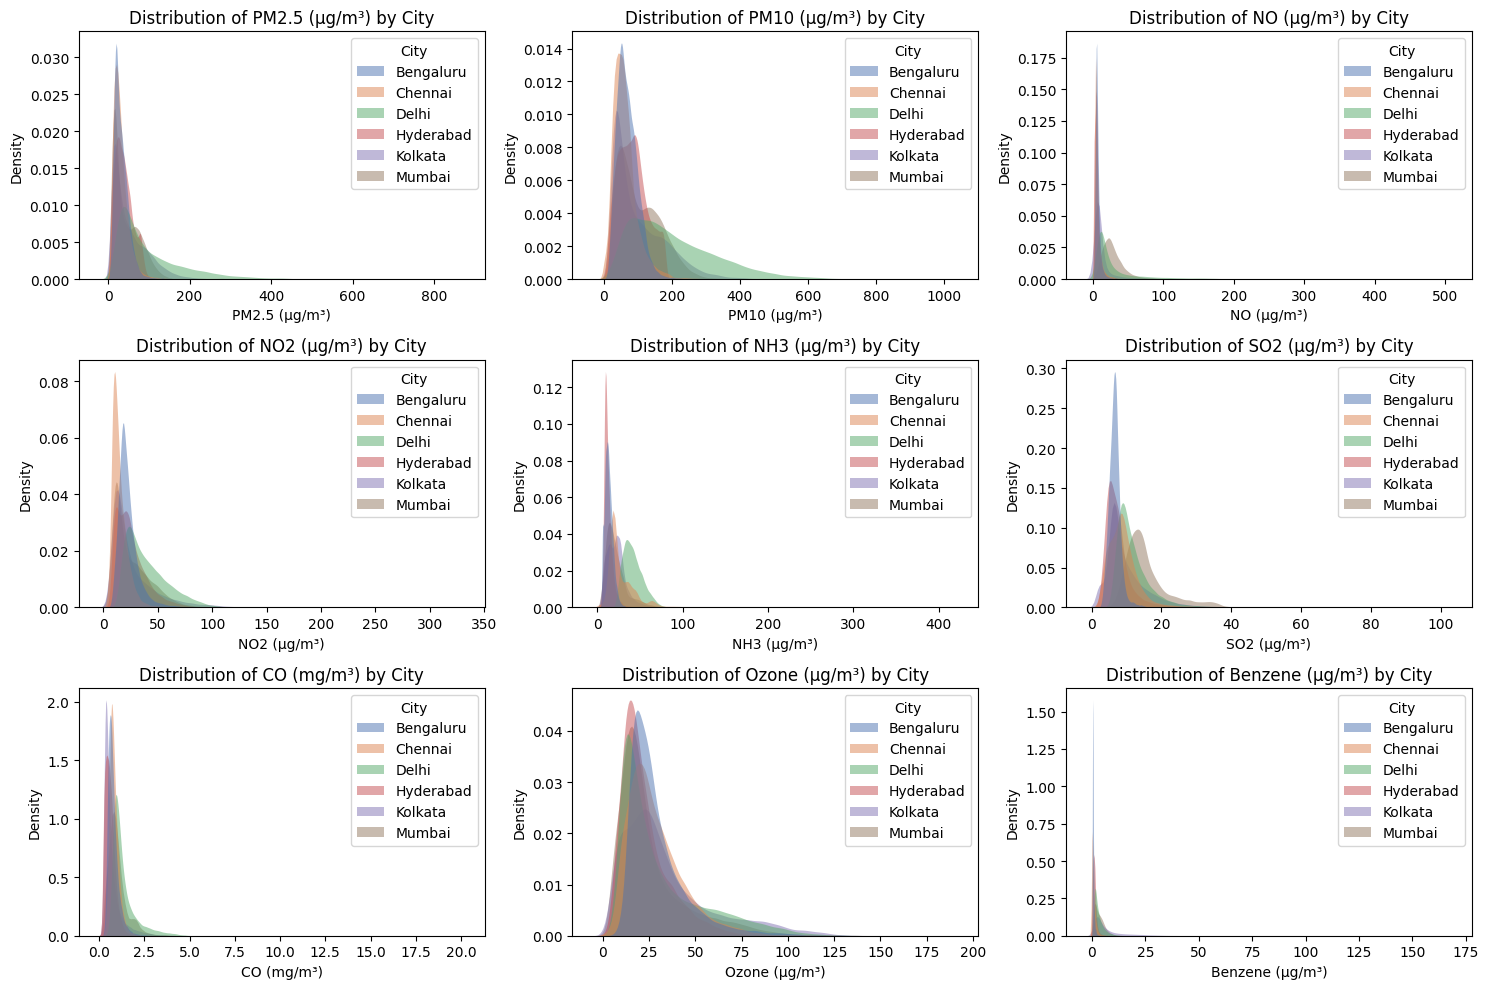

In [ ]:
# Histograms: Visualize the distribution of key pollutants in df_All_cities
# pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
#               'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)',
#               'Benzene (µg/m³)']

pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
              'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)',
              'Benzene (µg/m³)']

plt.figure(figsize=(15, 10))

for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(df_All_cities, x=pollutant, hue='City', fill=True, common_norm=False, palette = 'deep', alpha=.5, linewidth=0)
    plt.title(f'Distribution of {pollutant} by City')
    plt.xlabel(pollutant)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Insights:

1. Airborne particulate matter (PM) : Bangalore and Chennai has most of their samples under 100 and 200 for PM2.5 and PM10 respectively. Delhi has a more flatter distribution with higher number of samples having high values for PM pollutants.

2. Ozone and CO: All the cities are showing an identical trend w.r.t Ozone.

3. SO2 - Bangalore has most of the samples showing values in the range 0-10. Mumbai shows higher values for SO2 while the samples for other cities shows a sinusoidal curve between 0 and 30.

4. Among all the pollutants, Delhi shows a trend of flatter sinusoidal curves with highest pollutant levels than other cities for all pollutants other than SO2.

2. Average value of major pollutants for each city.

This plot will help us visualize the major pollutants for each city and compare the average value of each pollutant across the cities under study.

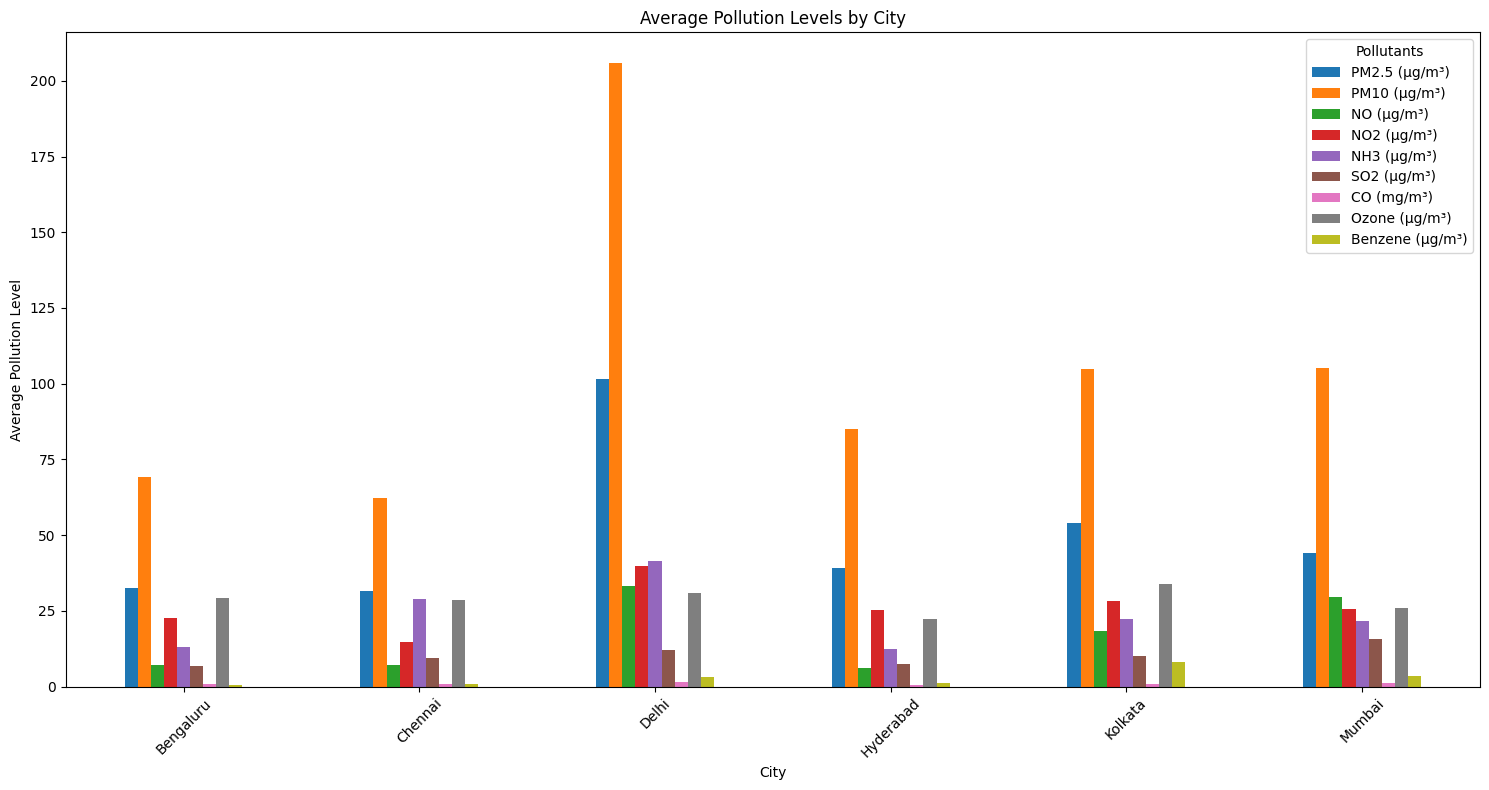

In [ ]:

# Group data by city and calculate the average pollution levels
city_pollution = df_All_cities.groupby('City')[pollutants].mean()

# Plotting the average pollution levels for each city
city_pollution.plot(kind='bar', figsize=(15, 8))
plt.title('Average Pollution Levels by City')
plt.ylabel('Average Pollution Level')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()

Insights:

1. For all the cities the major air pollution comes from "Airborne particulate matter (PM)".
2. Delhi and Mumbai has higher values for almost all pollutants.

3. Level of pollutants across Cities for the duration 2019 - 2024

The intention is to compare the levels of pollutants across cities for the years 2019 - 2024.

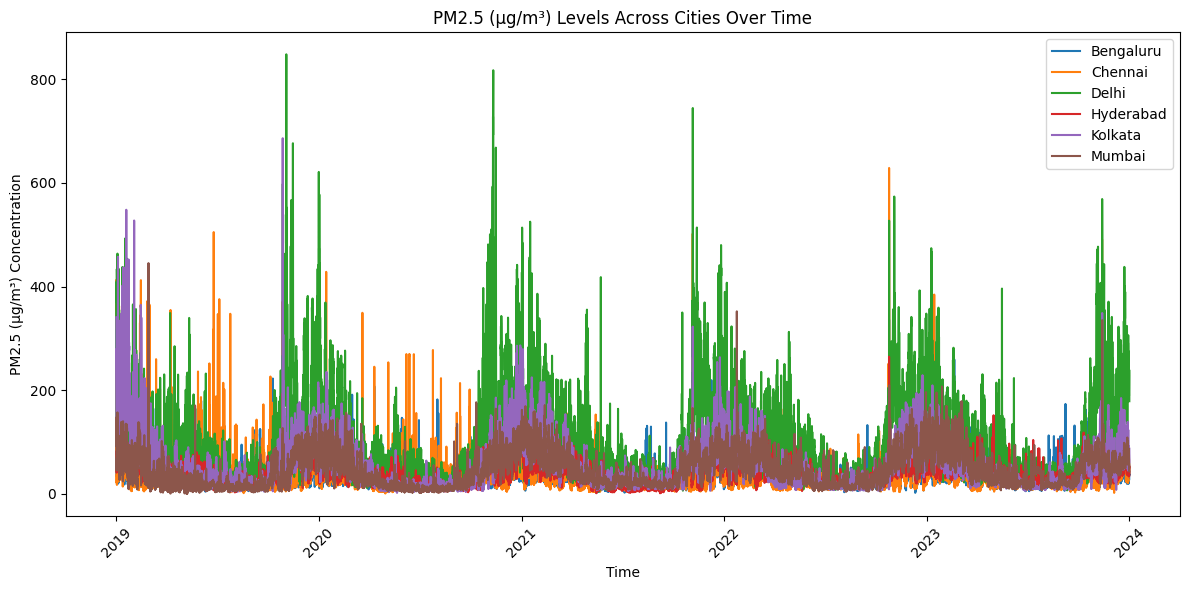

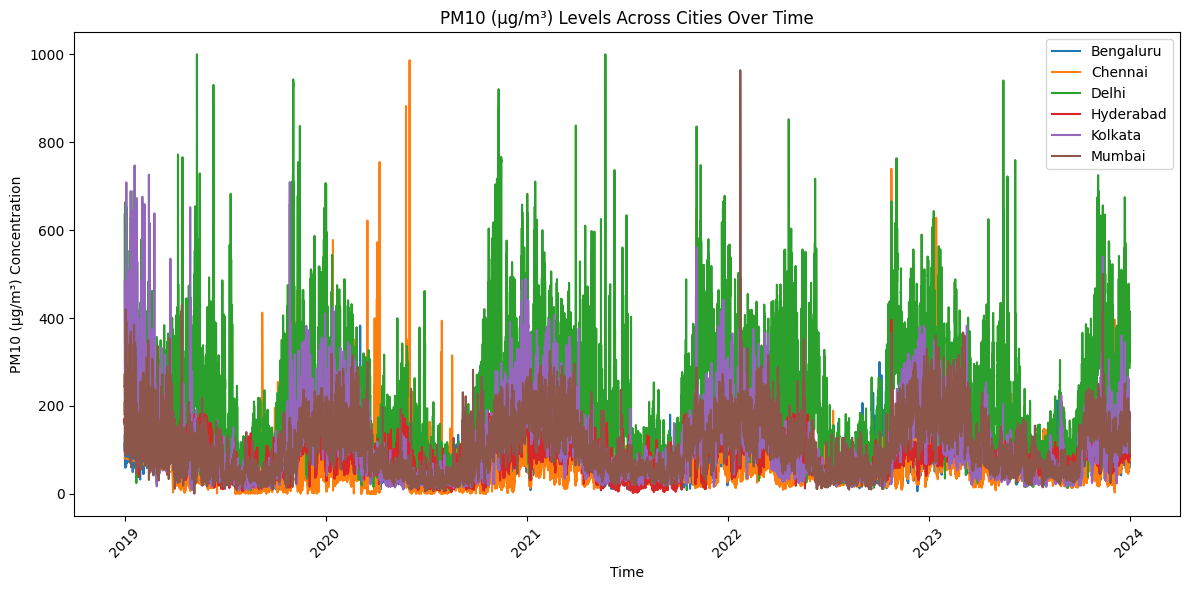

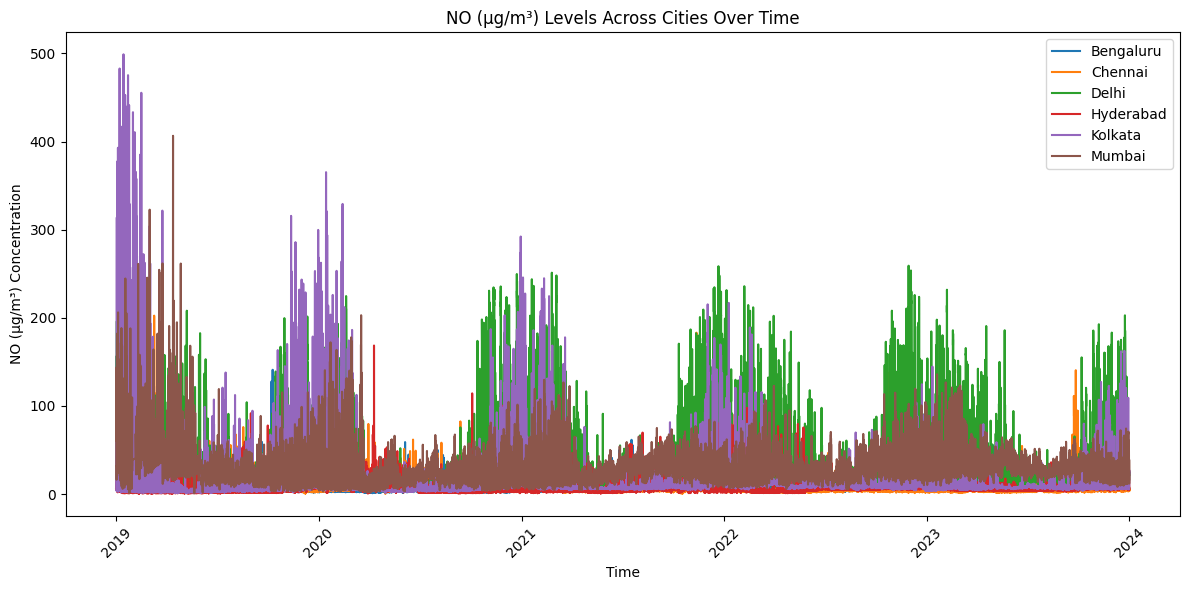

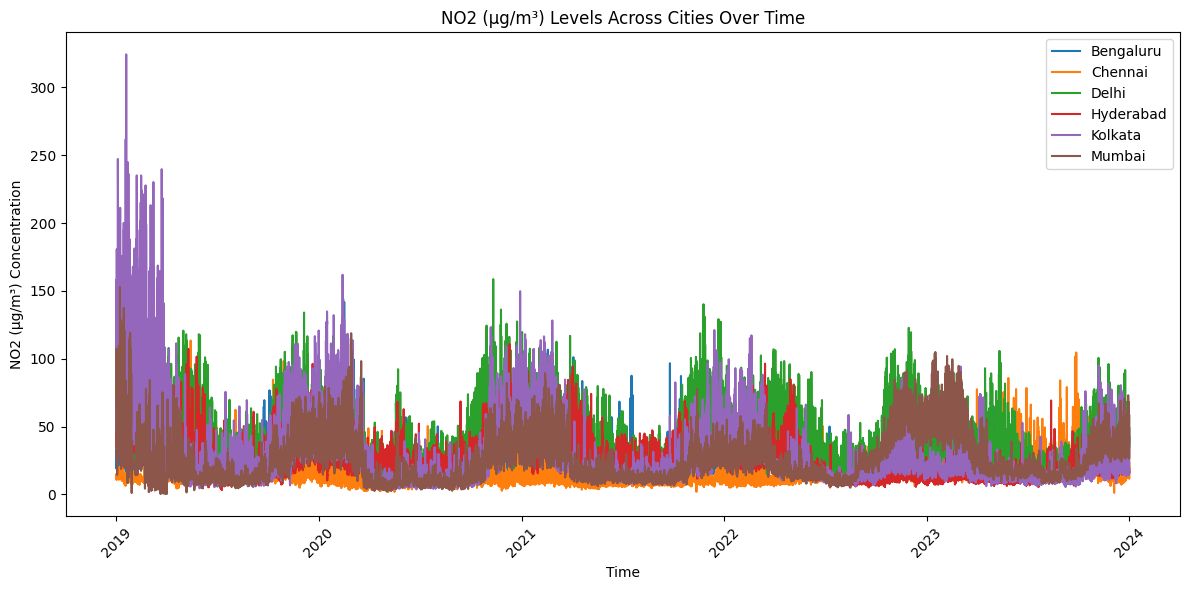

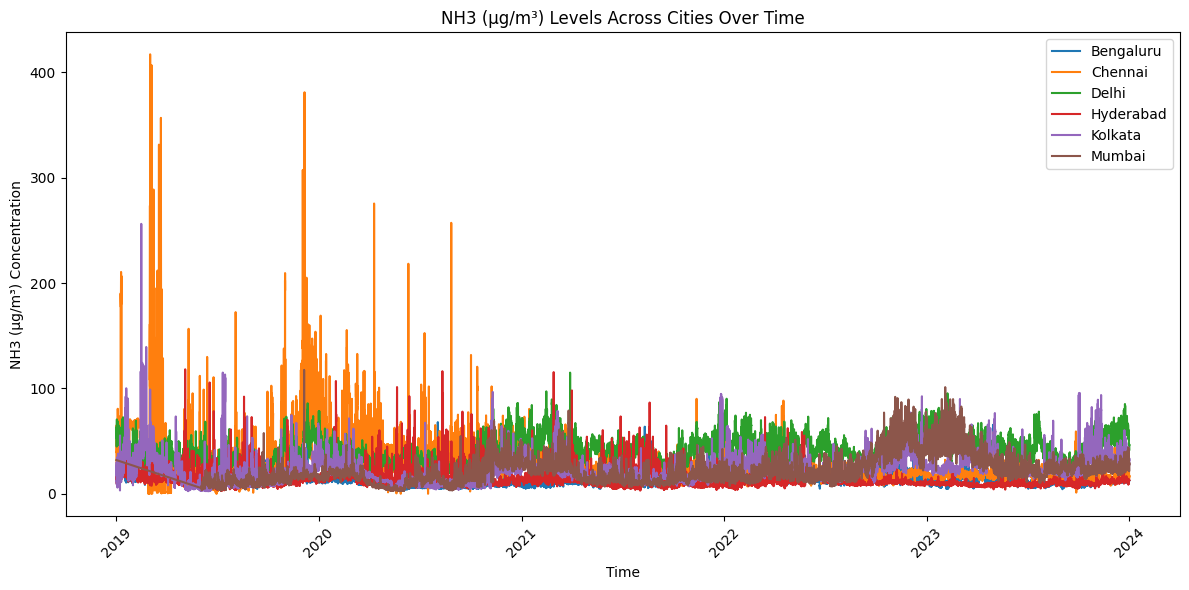

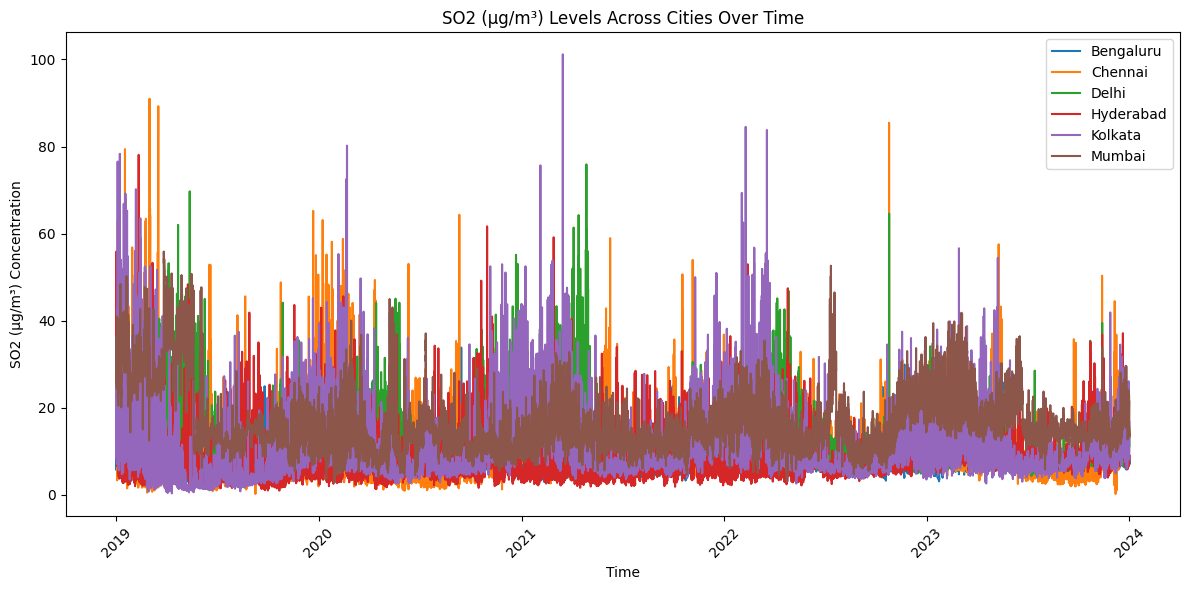

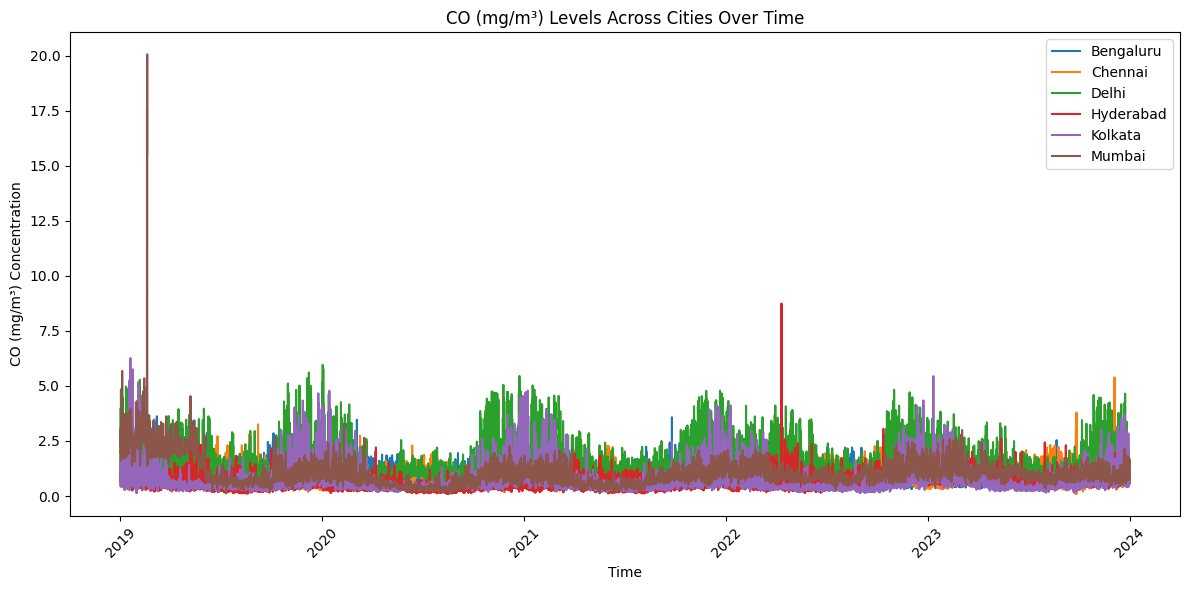

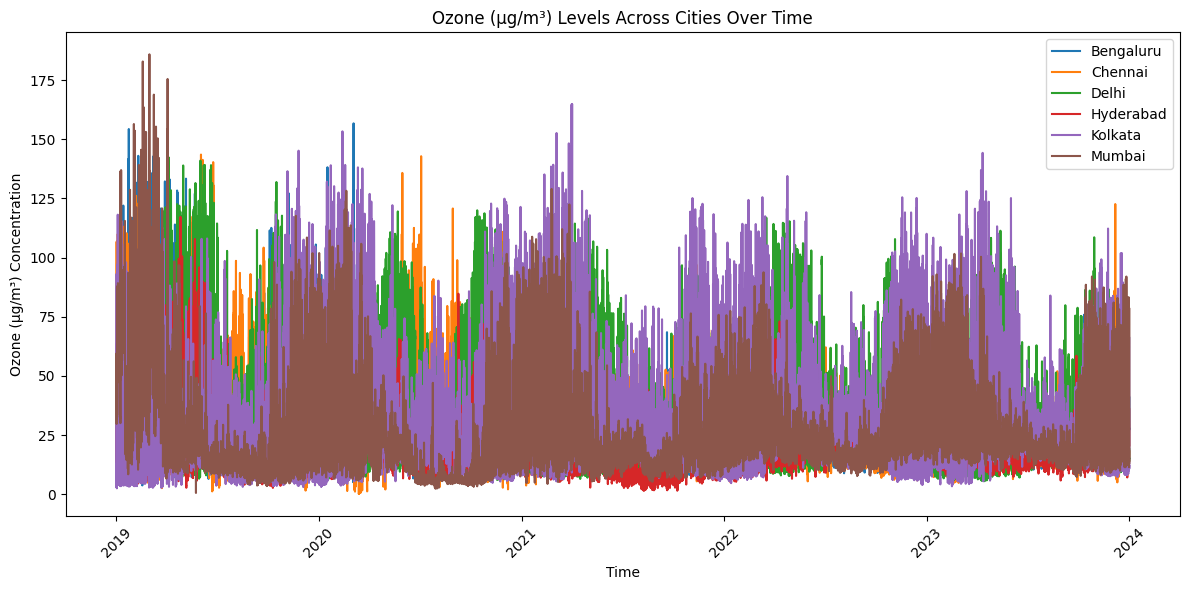

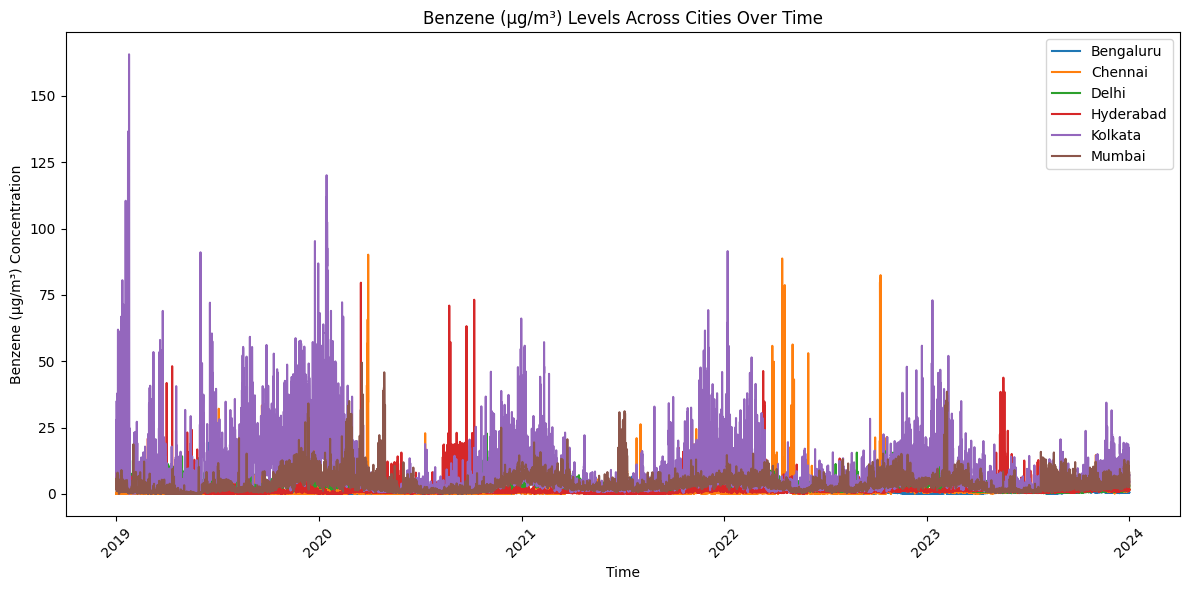

In [ ]:

# List of cities to plot
cities = df_All_cities['City'].unique()

# List of pollutants to plot
pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
              'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)',
              'Benzene (µg/m³)']

# Create a plot for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    for city in cities:
        city_data = df_All_cities[df_All_cities['City'] == city]
        plt.plot(city_data['Timestamp'], city_data[pollutant], label=city)

    plt.xlabel('Time')
    plt.ylabel(f'{pollutant} Concentration')
    plt.title(f'{pollutant} Levels Across Cities Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Insights

1. Chennai is able to control air pollution and sustain it post COVID lockdown.
2. Air pollution levels are consistent across years in Delhi and has the highest levels for most of the pollutants.
3. Kolkata and Mumbai are showing higher levels for Ozone and Benzene pollutant levels.
4. Out of the cities under study, Mumbai is showing an upward trend for pollutant levels.

4. Interactive plot to visualize the level of different pollutants for each city.

The intention is to generate an interactive plot to study the levels of different pollutants for each city.

In [ ]:
# List of pollutants to plot
#pollutants = 'NO (µg/m³)' #@param ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)','NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)']

# Dropdown for city selection
#city_to_plot = 'Delhi' #@param ['Delhi', 'Mumbai', 'Bengaluru', 'Chennai', 'Kolkata', 'Hyderabad']

# years_to_plot = [2019, 2020, 2021, 2022, 2023]

# Create a plot for each pollutant for the selected city
def plot_city(city_to_plot, pollutants):
    plt.figure(figsize=(12, 6))
    city_data = df_All_cities[df_All_cities['City'] == city_to_plot]
    plt.plot(city_data['Timestamp'], city_data[pollutants], label=city_to_plot)
    plt.xlabel('Time')
    plt.ylabel(f'{pollutants} Concentration')
    plt.title(f'{pollutants} Levels in {city_to_plot} Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create an interactive widget
city_dropdown = widgets.Dropdown(
    options=df_All_cities['City'].unique(),
    description='Select City:',
    value=df_All_cities['City'].unique()[0]
)

# Create an interactive widget
pollutant_dropdown = widgets.Dropdown(
    options=['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)','NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)'],
    description='Select parameter:',
    value= 'PM2.5 (µg/m³)'
)

interactive_plot = interact(plot_city, city_to_plot=city_dropdown, pollutants = pollutant_dropdown)


interactive(children=(Dropdown(description='Select City:', options=('Bengaluru', 'Chennai', 'Delhi', 'Hyderaba…

Insights

1. Bangalore is showing a downward trend for NOx and SO2 especially post COVID lockdown.
2. Levels of NOx and NH3 are showing a downward trend fopr Hyderabad.
3. Mumbai is showing a slight upward trend on PM levels for the last 2 years.
4. Levels of NH3 and SO2 are also on rise post COVID lockdown for Mumbai.

5. Interactive plot of monthly average levels of different pollutants

The intention is to identify the seasonal change of pollutant values across cities and identify the months where a particular pollutant level reaches their peak.

In [ ]:

# List of pollutants to plot
#pollutants = 'PM10 (µg/m³)' #@param ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)','NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)']

# Dropdown for city selection
#city_to_plot = 'Delhi' #@param ['Delhi', 'Mumbai', 'Bengaluru', 'Chennai', 'Kolkata', 'Hyderabad']

#year_to_plot = 2019 #@param {type:"slider", min:2019, max:2023, step:1}

def plot_city(city_to_plot, year_to_plot, pollutants):
    # Convert 'Timestamp' to datetime objects if not already
    df_All_cities['Timestamp'] = pd.to_datetime(df_All_cities['Timestamp'])
    # Select data for the specified city and pollutant
    city_data = df_All_cities[df_All_cities['City'] == city_to_plot]

    city_data = city_data[city_data['Timestamp'].dt.year == year_to_plot]
    # Convert 'Timestamp' to datetime objects if not already
    city_data['Timestamp'] = pd.to_datetime(city_data['Timestamp'])

    # Extract year and month
    city_data['Year'] = city_data['Timestamp'].dt.year
    city_data['Month'] = city_data['Timestamp'].dt.month


    # Group data by month and calculate the mean pollutant concentration
    monthly_data = city_data.groupby('Month')[pollutants].mean()


    # Create the line plot
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_data.index, monthly_data.values)
    plt.xlabel('Month')
    plt.ylabel(f'{pollutants} Concentration')
    plt.title(f'Monthly Average {pollutants} Levels in {city_to_plot}')
    plt.xticks(monthly_data.index,calendar.month_abbr[1:]) # ensures all months are shown on x-axis
    plt.tight_layout()
    plt.show()

# Create the slider
year_slider = widgets.IntSlider(
    value=2019,           # Default starting value
    min=2019,             # Minimum value
    max=2023,             # Maximum value
    step=1,               # Step size
    description='Year:',  # Label for the slider
    continuous_update=False  # Update only when done sliding
)

# Create an interactive widget for city
city_dropdown = widgets.Dropdown(
    options=df_All_cities['City'].unique(),
    description='Select City:',
    value=df_All_cities['City'].unique()[0]
)

# Create an interactive widget for pollutant
pollutant_dropdown = widgets.Dropdown(
    options=['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)','NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)'],
    description='Select parameter:',
    value= 'PM2.5 (µg/m³)'
)

interactive_plot = interact(plot_city, city_to_plot=city_dropdown, pollutants = pollutant_dropdown, year_to_plot = year_slider)

interactive(children=(Dropdown(description='Select City:', options=('Bengaluru', 'Chennai', 'Delhi', 'Hyderaba…

Insights

1. PM pollutants show higher levels in the winter months and lower during the rains.
2. The values for NH3 and SO2 goes highest during the summer months.

6. Interactive plot to compare change in monthly pollutant levels across years

The intention is to identify the seasonal change of pollutant values across cities and identify the months where a particular pollutant level reaches their peak.

In [ ]:
# List of pollutants to plot
#pollutants = 'NO2 (µg/m³)'  #@param ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)']

# Dropdown for city selection
#city_to_plot = 'Delhi' #@param ['Delhi', 'Mumbai', 'Bengaluru', 'Chennai', 'Kolkata', 'Hyderabad']

def plot_city(city_to_plot, pollutants):
    # Select data for the specified city and pollutant
    city_data = df_All_cities[df_All_cities['City'] == city_to_plot]

    # Convert 'Timestamp' to datetime objects if not already
    city_data['Timestamp'] = pd.to_datetime(city_data['Timestamp'])

    # Extract year and month
    city_data['Year'] = city_data['Timestamp'].dt.year
    city_data['Month'] = city_data['Timestamp'].dt.month

    # Group data by year and month and calculate the mean pollutant concentration
    monthly_data = city_data.groupby(['Year', 'Month'])[pollutants].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Month', y=pollutants, hue='Year', data=monthly_data)
    plt.xlabel('Month')
    plt.ylabel(f'{pollutants} Concentration')
    plt.title(f'Monthly Average {pollutants} Levels in {city_to_plot} (2019-2023)')
    plt.xticks(monthly_data['Month'].unique(),calendar.month_abbr[1:])
    plt.tight_layout()
    plt.show()

# Create an interactive widget for city
city_dropdown = widgets.Dropdown(
    options=df_All_cities['City'].unique(),
    description='Select City:',
    value=df_All_cities['City'].unique()[0]
)

# Create an interactive widget for pollutant
pollutant_dropdown = widgets.Dropdown(
    options=['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)','NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)'],
    description='Select parameter:',
    value= 'PM2.5 (µg/m³)'
)

interactive_plot = interact(plot_city, city_to_plot=city_dropdown, pollutants = pollutant_dropdown)

interactive(children=(Dropdown(description='Select City:', options=('Bengaluru', 'Chennai', 'Delhi', 'Hyderaba…

Insights

1. PM pollutants show higher levels in the winter months and lower during the rains.
2. The values for NH3 and SO2 goes highest during the summer months.

7. Interactive plot to compare the montlhly environmental parameters across years.

Shifting the analysis towards the environmental parameters and their impact on pollution. We will start this off by looking interactively at the monthly average value for each of the environmental parameters across the years of study for selected cities.

In [ ]:
# List of environmental parameters to plot
#env_params = 'AT (°C)'  #@param ['AT (°C)', 'RH (%)', 'TOT-RF (mm)', 'BP (mmHg)', 'WS (m/s)', 'SR (W/mt2)']

# Dropdown for city selection
#city_to_plot = 'Delhi' #@param ['Delhi', 'Mumbai', 'Bengaluru', 'Chennai', 'Kolkata', 'Hyderabad']

def plot_city(city_to_plot, env_params):
    # Select data for the specified city and pollutant
    city_data = df_All_cities[df_All_cities['City'] == city_to_plot]

    # Convert 'Timestamp' to datetime objects if not already
    city_data['Timestamp'] = pd.to_datetime(city_data['Timestamp'])

    # Extract year and month
    city_data['Year'] = city_data['Timestamp'].dt.year
    city_data['Month'] = city_data['Timestamp'].dt.month

    # Group data by year and month and calculate the mean pollutant concentration
    monthly_data = city_data.groupby(['Year', 'Month'])[env_params].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Month', y=env_params, hue='Year', data=monthly_data)
    plt.xlabel('Month')
    plt.ylabel(f'{env_params} Concentration')
    plt.title(f'Monthly Average {env_params} Levels in {city_to_plot} (2019-2023)')
    plt.xticks(monthly_data['Month'].unique(),calendar.month_abbr[1:])
    plt.tight_layout()
    plt.show()

# Create an interactive widget
city_dropdown = widgets.Dropdown(
    options=df_All_cities['City'].unique(),
    description='Select City:',
    value=df_All_cities['City'].unique()[0]
)

# Create an interactive widget
env_dropdown = widgets.Dropdown(
    options=['AT (°C)', 'RH (%)', 'TOT-RF (mm)', 'BP (mmHg)', 'WS (m/s)', 'SR (W/mt2)'],
    description='Select parameter:',
    value= 'AT (°C)'
)

interactive_plot = interact(plot_city, city_to_plot=city_dropdown, env_params = env_dropdown)


interactive(children=(Dropdown(description='Select City:', options=('Bengaluru', 'Chennai', 'Delhi', 'Hyderaba…

Insights
1. Except for a few outliers each city shows a uniform trend for environmental factors across the years, especially for the major ones like temperature(AT), total rainfall and humidity(RH).

2. Delhi experiences sharp winter and both Bangalore and Hyderabad has moderate winter season.

3. Temperature levels for Chennai remains consistently on the higher side for Chennai throughout the year.

8. Study the impact of environmental parameters on AQI values

Now we are looking at the impact of different envornmental parameters on AQI value for a given city.

In [ ]:
def plot_city(city_to_plot):
    # Select data for the specified city
    city_data = df_All_cities[df_All_cities['City'] == city_to_plot].copy()

    # Define a color mapping for AQI classes
    aqi_color_map = {
        'Good': 'darkgreen',
        'Satisfactory': 'lightgreen',
        'Moderate': 'yellow',
        'Poor': 'orange',
        'Very Poor': 'red',
        'Severe': 'darkred'
    }

    # Select relevant columns for analysis
    columns_to_plot = ['AT (°C)', 'RH (%)', 'TOT-RF (mm)', 'BP (mmHg)', 'WS (m/s)']

    # Create a heatmap to show correlations between environmental parameters and AQI class
    plt.figure(figsize=(12, 8))
    correlation_matrix = city_data[columns_to_plot + ['AQI']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for Environmental Parameters and AQI in {city_to_plot}')
    plt.show()


    # Create a scatter plot for each environmental parameter against AQI class
    for parameter in columns_to_plot:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='AQI_class', y=parameter, data=city_data, hue='AQI_class', palette=aqi_color_map)
        plt.xlabel('AQI Class')
        plt.ylabel(parameter)
        plt.title(f'Impact of {parameter} on AQI Class in {city_to_plot}')
        plt.show()

# Create an interactive widget
city_dropdown = widgets.Dropdown(
    options=df_All_cities['City'].unique(),
    description='Select City:',
    value=df_All_cities['City'].unique()[0]
)

interactive_plot = interact(plot_city, city_to_plot=city_dropdown)

interactive(children=(Dropdown(description='Select City:', options=('Bengaluru', 'Chennai', 'Delhi', 'Hyderaba…

Insights

1. AQI classes of poor and very poor and largely distributed across lower AT and higher RH values.
2. Higher wind speed helps to reduce air pollution.

9. Interactive plot on monthly AQI distribution for cities

Lets look at the monthly trend of AQI for different cities. This will help us to identify the best and worst months w.r.t air quality for each city.

In [ ]:
# Define a color mapping for AQI classes
aqi_colors  = {
    'Good': 'darkgreen',
    'Satisfactory': 'lightgreen',
    'Moderate': 'yellow',
    'Poor': 'orange',
    'Very Poor': 'red',
    'Severe': 'darkred'
}

# Function to plot bar chart for a specific city
def plot_bar(city_to_plot):
    print(city_to_plot)
    # Select data for the specified city
    city_data = df_All_cities.loc[df_All_cities['City'] == city_to_plot]

    # Convert 'Timestamp' to datetime objects if not already
    city_data['Timestamp'] = pd.to_datetime(city_data['Timestamp'])

    # Extract year and month
    city_data['Year'] = city_data['Timestamp'].dt.year
    city_data['Month'] = city_data['Timestamp'].dt.month

    monthly_aqi_counts = city_data.groupby(['Month', 'AQI_class']).size().reset_index(name='frequency')
    monthly_aqi_counts['Month'] = monthly_aqi_counts['Month'].apply(lambda x: calendar.month_abbr[x])
    #print(monthly_aqi_counts.head())

    plt.figure(figsize=(10, 6))

    sns.barplot(x='Month', y='frequency', data=monthly_aqi_counts, hue='AQI_class', palette=aqi_colors)

    plt.xlabel("Month")
    plt.ylabel("Frequency")
    plt.title("AQI Distribution by Month")
    plt.xticks(rotation=45)
    plt.legend(title="AQI Class")
    plt.tight_layout()
    plt.show()

# Create an interactive widget
city_dropdown = widgets.Dropdown(
    options=df_All_cities['City'].unique(),
    description='Select City:',
    value=df_All_cities['City'].unique()[0]
)

interactive_plot = interact(plot_bar, city_to_plot=city_dropdown)

interactive(children=(Dropdown(description='Select City:', options=('Bengaluru', 'Chennai', 'Delhi', 'Hyderaba…

Insights:

1. AQI for Delhi worsens significantly in the winter months.
2. All the cities except Delhi maintains a healthy AQI in the months June to September.



10. Study of AQI distribution across cities

We are trying to get an idea of AQI distribution for each cities. We will plot the count of AQI classes observed for each city. We can identify the cities having higher ratio of good AQI from this plot.

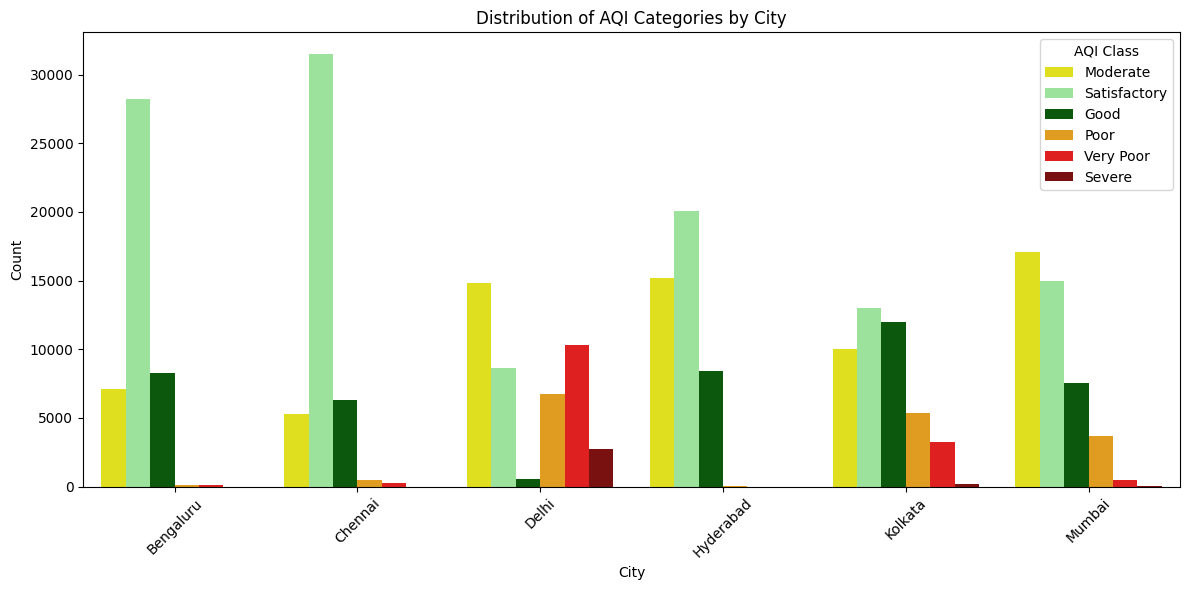

In [ ]:
aqi_colors  = {
    'Good': 'darkgreen',
    'Satisfactory': 'lightgreen',
    'Moderate': 'yellow',
    'Poor': 'orange',
    'Very Poor': 'red',
    'Severe': 'darkred'
}

plt.figure(figsize=(12, 6))
sns.countplot(x='City', hue='AQI_class', data=df_All_cities, palette=aqi_colors)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of AQI Categories by City')
plt.xticks(rotation=45)
plt.legend(title='AQI Class')
plt.tight_layout()
plt.show()

Insights

1. Delhi reports the worst AQI values.
2. Bangalore and Chennai maintains large propotion of healthy AQI.

Discover the monthly average AQI across all cities

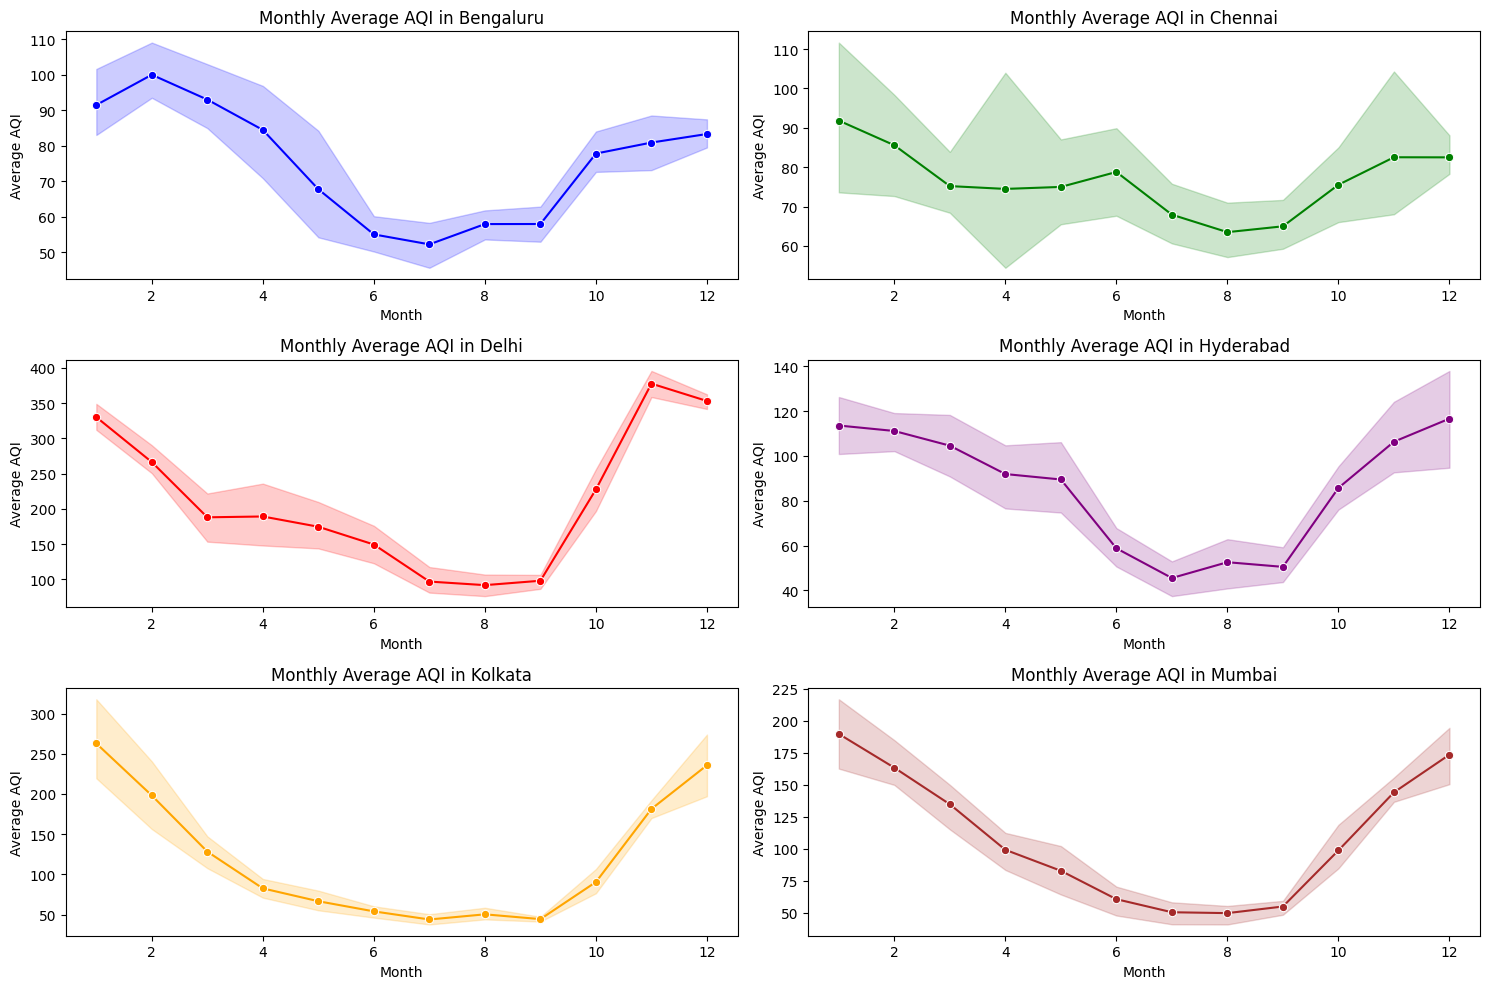

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



cities = ["Bengaluru", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai"]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

plt.figure(figsize=(15, 10))

for i, city in enumerate(cities):
  monthly_avg_aqi = (
    df_All_cities[df_All_cities['City'] == city]  # Filter for the specific city
    .assign(Year=df_All_cities['Timestamp'].dt.year, Month=df_All_cities['Timestamp'].dt.month)  # Extract Year and Month
    .groupby(['Year', 'Month'])['AQI']  # Group by Year and Month
    .mean()  # Calculate average AQI
    .reset_index(name='avg_AQI')  # Reset index and name the result column
)

  plt.subplot(3, 2, i + 1)
  sns.lineplot(x="Month", y="avg_AQI", data=monthly_avg_aqi, marker='o', color=colors[i])
  plt.title(f'Monthly Average AQI in {city}')
  plt.xlabel('Month')
  plt.ylabel('Average AQI')

plt.tight_layout()
plt.show()


**Insights**
1. Delhi Experiences a Drastic AQI Increase in Winter (November-December): Unlike other cities, Delhi shows a sharp rise in average AQI during the last months of the year, peaking in November and December. This suggests severe air pollution during winter, likely due to factors such as crop burning and stagnant weather conditions.

2. Bengaluru and Hyderabad Have the Best Air Quality in Summer: Both cities exhibit the lowest AQI levels around the middle of the year (April to June), likely due to favorable weather and lower pollution levels during this period.

3. Seasonal Variation in Chennai Is Less Pronounced: Chennai's AQI shows smaller fluctuations throughout the year compared to other cities, indicating more consistent air quality. However, there is a slight rise in AQI during the monsoon months.

4. Kolkata Experiences a Clear Decline During Summer Months: Kolkata shows a steady decline in AQI from January to around May, hitting its lowest levels during summer. However, the AQI begins to rise again as the year progresses.

5. Mumbai’s AQI Is Relatively Stable With a Gradual Dip in Monsoon: Mumbai exhibits a moderate AQI throughout the year with a dip during the monsoon season (July-August), which is typical for coastal cities benefiting from rain-driven pollution dispersion.

11. Study the impact of industrial and vehicular pollution across cities.

Now lets look at two of the added features - Industrial and Vehicular pollution. We are trying to broadly categorize the pollutants to their possible origin and study the major contributor to air pollution for each city.

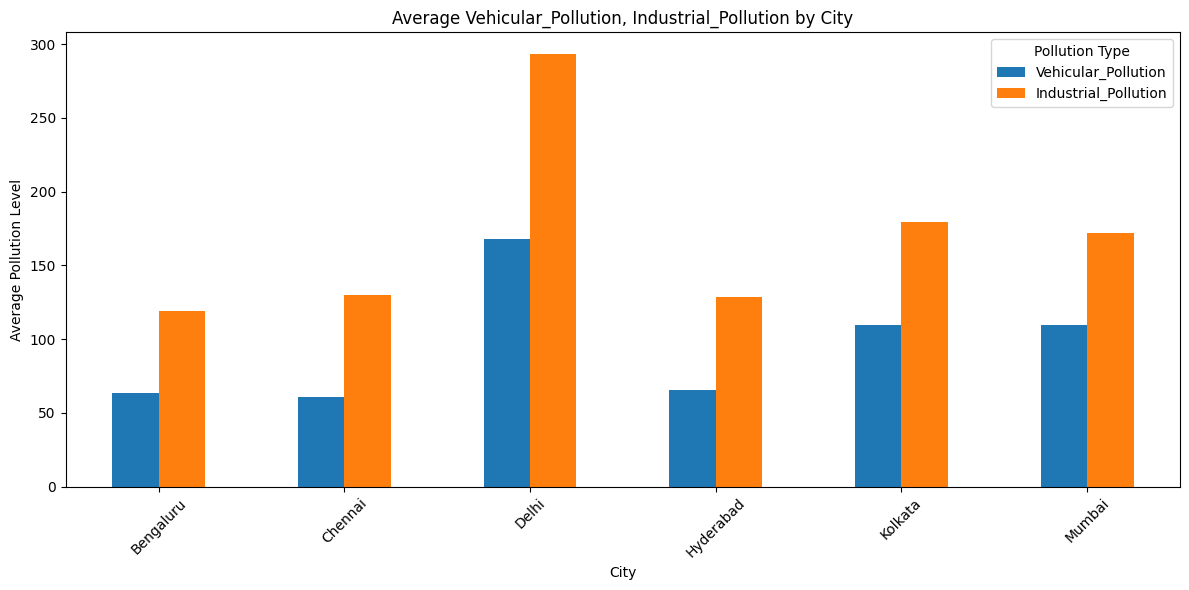

In [ ]:

# Group by city and plot average vehicular_polltiion and industrial_pollution


def plot_average_pollution_by_city(df, pollution_columns):
    """Groups data by city and plots the average vehicular and industrial pollution.

    Args:
        df: DataFrame containing city, vehicular pollution, and industrial pollution data.
        pollution_columns:  A list of pollution column names to plot.
    """
    city_pollution_data = df.groupby('City')[pollution_columns].mean()
    city_pollution_data.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Average {", ".join(pollution_columns)} by City')
    plt.ylabel('Average Pollution Level')
    plt.xlabel('City')
    plt.xticks(rotation=45)
    plt.legend(title='Pollution Type')
    plt.tight_layout()
    plt.show()

# Example usage (replace with your actual DataFrame and column names):
pollution_columns = ['Vehicular_Pollution', 'Industrial_Pollution']
plot_average_pollution_by_city(df_All_cities, pollution_columns)

Insights

1. Industrial pollution is more than vehicular pollution in all the cities.

12. Interactive plot to study the levels of industrial and vehicular pollution over the years for each city.

Lets take a loot at the yearly trend for vehicular and industrial pollution to see if we have any cities showing positive of negative trend for any one of this ?

In [ ]:

def plot_average_yearly_vehicular_pollution(city_to_plot, pollution_columns):

    city_data = df_All_cities[df_All_cities['City'] == city_to_plot].copy()
    # Ensure 'Timestamp' is datetime
    city_data['Timestamp'] = pd.to_datetime(city_data['Timestamp'])
    city_data['Year'] = city_data['Timestamp'].dt.year
    """Plots the average yearly vehicular pollution data for a given city.

    Args:
        city_data (pd.DataFrame): DataFrame containing the pollution data for the city.
            It must include 'Year' and 'Vehicular_Pollution' columns.
    """

    # Group data by year and calculate the mean vehicular pollution
    yearly_pollution = city_data.groupby('Year')[pollution_columns].mean()

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(yearly_pollution.index, yearly_pollution.values)
    plt.xlabel("Year")
    plt.ylabel(f"Average {pollution_columns}")
    plt.title(f"Average Yearly {pollution_columns} in {city_data['City'].iloc[0]}")
    plt.xticks(yearly_pollution.index)
    plt.tight_layout()
    plt.show()

# Create an interactive widget
city_dropdown = widgets.Dropdown(
    options=df_All_cities['City'].unique(),
    description='Select City:',
    value=df_All_cities['City'].unique()[0]
)

# Create an interactive widget
pollution_dropdown = widgets.Dropdown(
    options=['Vehicular_Pollution', 'Industrial_Pollution'],
    description='Select parameter:',
    value= 'Vehicular_Pollution'
)

interactive_plot = interact(plot_average_yearly_vehicular_pollution, city_to_plot=city_dropdown, pollution_columns = pollution_dropdown)


interactive(children=(Dropdown(description='Select City:', options=('Bengaluru', 'Chennai', 'Delhi', 'Hyderaba…

Insights

13. Interactive plot to study the average monthly levels of industrial and vehicular pollution for cities.

In the next 2 plots lets analyse the monthly average values for vehicular and industrial pollution across the cities.

In [ ]:
# PLot the average monthly vehicular/industrial pollution data

def plot_average_monthly_pollution(city_to_plot, year, pollution_type):

    city_data = df_All_cities[df_All_cities['City'] == city_to_plot].copy()
    city_data['Timestamp'] = pd.to_datetime(city_data['Timestamp'])
    # Filter data for the specified year and pollution type
    city_data_year = city_data[city_data['Timestamp'].dt.year == year]
    city_data_year['Month'] = city_data_year['Timestamp'].dt.month
    monthly_pollution = city_data_year.groupby('Month')[pollution_type].mean()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_pollution.index, monthly_pollution.values)
    plt.xlabel("Month")
    plt.ylabel(f"Average {pollution_type}")
    plt.title(f"Average Monthly {pollution_type} in {city_data['City'].iloc[0]} ({year})")
    plt.xticks(monthly_pollution.index, calendar.month_abbr[1:])
    plt.tight_layout()
    plt.show()


# Create an interactive widget
city_dropdown = widgets.Dropdown(
    options=df_All_cities['City'].unique(),
    description='Select City:',
    value=df_All_cities['City'].unique()[0]
)

# Create an interactive widget
pollution_dropdown = widgets.Dropdown(
    options=['Vehicular_Pollution', 'Industrial_Pollution'],
    description='Select parameter:',
    value= 'Vehicular_Pollution'
)

# Create the slider
year_slider = widgets.IntSlider(
    value=2019,           # Default starting value
    min=2019,             # Minimum value
    max=2023,             # Maximum value
    step=1,               # Step size
    description='Year:',  # Label for the slider
    continuous_update=False  # Update only when done sliding
)

interactive_plot = interact(plot_average_monthly_pollution, city_to_plot=city_dropdown, year = year_slider, pollution_type = pollution_dropdown)


interactive(children=(Dropdown(description='Select City:', options=('Bengaluru', 'Chennai', 'Delhi', 'Hyderaba…

14. Interactive plot to compare the monthly levels of industrial and vehicular pollution across cities over the years.

In [ ]:
# Group by city and PLot the average monthly vehicular/industrial pollution data
def plot_average_monthly_pollution_by_city(year, pollution_type):
    # Ensure 'Timestamp' column is datetime
    df_All_cities['Timestamp'] = pd.to_datetime(df_All_cities['Timestamp'])
    # Filter data for the specified year
    df_year = df_All_cities[df_All_cities['Timestamp'].dt.year == year]

    # Group data by city and month, then calculate the mean pollution
    monthly_pollution = df_year.groupby(['City', df_year['Timestamp'].dt.month])[pollution_type].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Timestamp', y=pollution_type, hue='City', data=monthly_pollution)
    plt.xlabel("Month")
    plt.ylabel(f"Average {pollution_type}")
    plt.title(f"Average Monthly {pollution_type} by City ({year})")
    plt.xticks(monthly_pollution['Timestamp'].unique(), calendar.month_abbr[1:]) # Use month abbreviations
    plt.tight_layout()
    plt.show()

# Create an interactive widget
pollution_dropdown = widgets.Dropdown(
    options=['Vehicular_Pollution', 'Industrial_Pollution'],
    description='Select parameter:',
    value= 'Vehicular_Pollution'
)

# Create the slider
year_slider = widgets.IntSlider(
    value=2019,           # Default starting value
    min=2019,             # Minimum value
    max=2023,             # Maximum value
    step=1,               # Step size
    description='Year:',  # Label for the slider
    continuous_update=False  # Update only when done sliding
)

interactive_plot = interact(plot_average_monthly_pollution_by_city, year = year_slider, pollution_type = pollution_dropdown)

interactive(children=(IntSlider(value=2019, continuous_update=False, description='Year:', max=2023, min=2019),…

Insights

Delhi's Pollution Spike: Delhi consistently shows the highest levels of vehicular pollution throughout the year, with a significant increase in the winter months (October to December), likely due to weather conditions and increased vehicular activity.

Seasonal Variation: Most cities experience a general decrease in vehicular pollution during the monsoon months (June to August), likely due to reduced road traffic and natural cleaning effects of rain.

Inter-City Comparison: Bengaluru, Chennai, and Hyderabad exhibit relatively lower and more stable pollution levels compared to Delhi, Kolkata, and Mumbai, which have more pronounced seasonal trends.